In [3]:
#pendulum
import numpy as np
import scipy
from scipy import constants
from scipy.special import ellipk as F #complete elliptical integral of the first kind

theta0=60 # initial angular amplitude in degree
a=theta0/2.0
b=a*scipy.constants.pi/180.0 # angle in radian
k=np.sin(b) # k= sin(b)
m=k**2
alpha=F(m)
factor=2*alpha/scipy.constants.pi
print(factor)

1.0731820071493645


In [4]:
from scipy.integrate import quad
def integrand(x, a, b):
    return a*x**2 + b
a = 2
b = 1
I = quad(integrand, 0, 1, args=(a,b))
I

(1.6666666666666667, 1.8503717077085944e-14)

In [5]:
from scipy import integrate
import numpy as np
x2 = lambda x: x**2
integrate.quad(x2, 0, 4)

(21.333333333333332, 2.3684757858670003e-13)

In [6]:
invexp = lambda x: np.exp(-x)
integrate.quad(invexp, 0, np.inf)

(1.0, 5.842605965544164e-11)

In [7]:
#argument a =1,3
f = lambda x, a: a*x
y, err = integrate.quad(f, 0, 1, args=(1,))
y
y, err = integrate.quad(f, 0, 1, args=(3,))
y

1.5

In [8]:
import scipy.integrate as integrate
import scipy.special as special
result = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)
result

(1.1178179380783246, 7.866317250224184e-09)

In [9]:
f = lambda y, x: 1
integrate.dblquad(f, 0, np.pi/4, np.sin, np.cos)

(0.41421356237309503, 1.1083280054755938e-14)

In [10]:
import numpy as np
from scipy import integrate
f = lambda y, x: x*y**2
integrate.dblquad(f, 0, 2, 0, 1)

(0.6666666666666667, 7.401486830834377e-15)

In [11]:
# integral of xyz dzdydx  limit x:1-2; y:2-3;z:0-1
import numpy as np
from scipy import integrate
f = lambda z, y, x: x*y*z
integrate.tplquad(f, 1, 2, 2, 3, 0, 1)

(1.8749999999999998, 3.3246447942574074e-14)

In [12]:
#integral of xyz dzdydx  limit x:1-2; y:0-1-2x;z:0-1-x-2y
f = lambda z, y, x: x*y*z
integrate.tplquad(f, 0, 1, 0, lambda x: 1-2*x, 0, lambda x, y: 1-x-2*y)

(0.05416666666666668, 2.1774196738157757e-14)

In [13]:
#integrate F(x0,x1,x2,x3)dx0dx1dx2dx3, limit x0 0-1, x1 (-1)-1, x2, 0.13-0.8, x3, -0.15-1
import numpy as np
from scipy import integrate
func = lambda x0,x1,x2,x3 : x0**2 + x1*x2 - x3**3 + np.sin(x0) + (
                                1 if (x0-.2*x3-.5-.25*x1>0) else 0)
def opts0(*args, **kwargs):
    return {'points':[0.2*args[2] + 0.5 + 0.25*args[0]]}
integrate.nquad(func, [[0,1], [-1,1], [.13,.8], [-.15,1]],
                opts=[opts0,{},{},{}], full_output=True)

(1.5267454070738633, 2.9437360001402324e-14, {'neval': 388962})

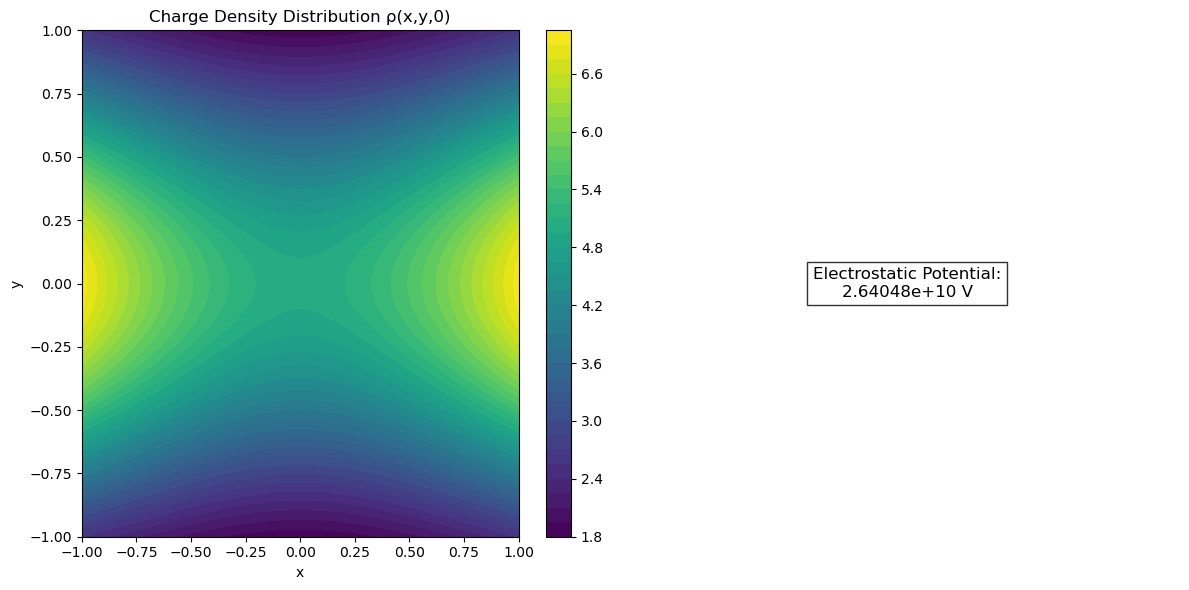

Electrostatic Potential at point (5, 6, 8): 2.64048e+10 V


In [14]:
#Gaussian Quadrature
import numpy as np
import matplotlib.pyplot as plt

# Constants
epsilon_0 = 8.854e-12  # Permittivity of free space (F/m)
x_p, y_p, z_p = 5, 6, 8  # Point where potential is calculated

# Define the charge distribution function ρ(x, y, z)
def rho(x, y, z):
    return 5 * np.exp(-y**2) * (x**2 + 0.5 * x * z + 1)**0.48

# Gaussian Quadrature weights and points for 2 points (you can expand to 3 points for higher accuracy)
weights = [1, 1]
nodes = [-1/np.sqrt(3), 1/np.sqrt(3)]

# Define the integration limits
a, b = -1, 1

# Calculate the electrostatic potential using Gaussian quadrature
def gaussian_quadrature():
    integral_result = 0.0
    
    # Perform the integration for each dimension
    for i in range(len(weights)):
        for j in range(len(weights)):
            for k in range(len(weights)):
                # Transform nodes to the integration limits
                x = (b - a) / 2 * nodes[i] + (b + a) / 2
                y = (b - a) / 2 * nodes[j] + (b + a) / 2
                z = (b - a) / 2 * nodes[k] + (b + a) / 2
                
                # Calculate the distance from the point (x_p, y_p, z_p)
                r_squared = (x - x_p)**2 + (y - y_p)**2 + (z - z_p)**2
                
                # Calculate the contribution to the integral
                integral_result += weights[i] * weights[j] * weights[k] * rho(x, y, z) / np.sqrt(r_squared)

    # Scale by the volume of integration
    volume_factor = (b - a)**3 / 8  # Volume factor for the cubic integration limits
    integral_result *= volume_factor

    # Apply the constant factor 1/(4*pi*epsilon_0)
    return integral_result / (4 * np.pi * epsilon_0)

# Calculate the electrostatic potential
potential = gaussian_quadrature()

# Prepare data for plotting
x_vals = np.linspace(-1, 1, 100)
y_vals = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.array([[rho(x, y, 0) for x in x_vals] for y in y_vals])  # Z=0 for visualization purposes

# Plot the charge distribution
plt.figure(figsize=(12, 6))

# Charge distribution plot
plt.subplot(1, 2, 1)
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title("Charge Density Distribution ρ(x,y,0)")
plt.xlabel("x")
plt.ylabel("y")

# Electrostatic potential plot at the point of interest
plt.subplot(1, 2, 2)
plt.text(0.5, 0.5, f'Electrostatic Potential:\n{potential:.5e} V', fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8))
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the results
print(f"Electrostatic Potential at point ({x_p}, {y_p}, {z_p}): {potential:.5e} V")

In [15]:
import numpy as np

def gaussian_quadrature(func, a, b, n):
    """
    Approximates the integral of a function using Gaussian quadrature.

    Parameters:
    func (callable): The function to integrate.
    a (float): The lower limit of integration.
    b (float): The upper limit of integration.
    n (int): The number of nodes to use (order of the quadrature).

    Returns:
    float: The approximate value of the integral.
    """
    
    # Get the nodes and weights for the specified order
    nodes, weights = np.polynomial.legendre.leggauss(n)

    # Change the nodes to the interval [a, b]
    transformed_nodes = 0.5 * (b - a) * nodes + 0.5 * (b + a)

    # Compute the integral using the weights and transformed nodes
    integral = 0.5 * (b - a) * np.sum(weights * func(transformed_nodes))

    return integral

# Example function to integrate
def f(x):
    return np.exp(-x**2)

# Integration limits
a = 0  # Lower limit
b = 1  # Upper limit
n = 5  # Number of nodes

# Perform integration using Gaussian quadrature
result = gaussian_quadrature(f, a, b, n)

# Print the result
print(f"Integral result: {result}")

Integral result: 0.746824126766248
